In [2]:
#currently my masks and pcb images are in CYMK so need to convert it into RGB for images and Black n White to maskes

In [1]:
from pathlib import Path
import os

In [2]:
# NOTE: Provide the path to the dataset root directory.
dataset_root = Path.cwd() / "../.." / "datasets" / "custom" / "pcb"
print(dataset_root)

C:\Users\rkros\Documents\openvino\anomalib_intel\notebooks\pcb_anomaly_detection\..\..\datasets\custom\pcb


In [3]:
from PIL import Image
def center_crop_image(im, new_width, new_height):
    width, height = im.size   # Get dimensions
    left = int((width - new_width)/2)
    top = int((height - new_height)/2)
    right = int((width + new_width)/2)
    bottom = int((height + new_height)/2)
    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return im
    
def convert_CMYK2RGB_n_centercrop(path_to_image, save_image_location, new_width, new_height):
    image = Image.open(path_to_image)
    image = image.convert('RGB')
    image = center_crop_image(image, new_width, new_height)
    image.save(save_image_location)

def convert_CMYK2BW_n_centercrop(path_to_image, save_image_location, new_width, new_height):
    image = Image.open(path_to_image)
    thresh = 200
    fn = lambda x : 255 if x > thresh else 0
    image = image.convert('L').point(fn, mode='1')
    image = center_crop_image(image, new_width, new_height)
    image.save(save_image_location)

In [4]:
#covert good and soldershot images to RGB 
images_folder = ["train/good", "test/good", "test/soldershot"]
new_images_folder = ["_train/good", "_test/good", "_test/soldershot"]
#pcb image size is more than that, we will center crop it to new 1024x1024 so that we can apply tiling
new_width = 1024
new_height = 1024
#create new directories first
for folder_name in new_images_folder:
    location = dataset_root / folder_name
    cmd = "mkdir -p {0}".format(location)
    os.system(cmd)

for folder_idx in range(len(images_folder)):
    location = dataset_root / images_folder[folder_idx] 
    files = os.listdir(location)
    image_count = len(files)
    for image in files:
        #covert each image to RGB and save it in a new directory
        #center croping images to 1024x1024 
        path_to_image = location / image
        save_image_location = dataset_root / new_images_folder[folder_idx] / image
        # print(path_to_image, " : ",save_image_location )
        convert_CMYK2RGB_n_centercrop(path_to_image, save_image_location, new_width, new_height)
print("Done")



Done


In [5]:
#convert ground_truth CYMK image to blacknwhite and center crop to 1024x1024
images_folder = ["ground_truth/soldershot"]
new_images_folder = ["_ground_truth/soldershot"]
#pcb image size is more than that, we will center crop it to new 1024x1024 so that we can apply tiling
new_width = 1024
new_height = 1024
#create new directories first
for folder_name in new_images_folder:
    location = dataset_root / folder_name
    cmd = "mkdir {0}".format(location)
    os.system(cmd)

for folder_idx in range(len(images_folder)):
    location = dataset_root / images_folder[folder_idx] 
    files = os.listdir(location)
    image_count = len(files)
    for image in files:
        #covert each mask to BnW and save it in a new directory
        #center croping images to 1024x1024 
        path_to_image = location / image
        save_image_location = dataset_root / new_images_folder[folder_idx] / image
        # print(path_to_image, " : ",save_image_location )
        convert_CMYK2BW_n_centercrop(path_to_image, save_image_location, new_width, new_height)
print("Done")



Done


In [13]:
#verify image with mask overlay

torch.Size([3, 1024, 1024]) torch.Size([1, 1024, 1024])


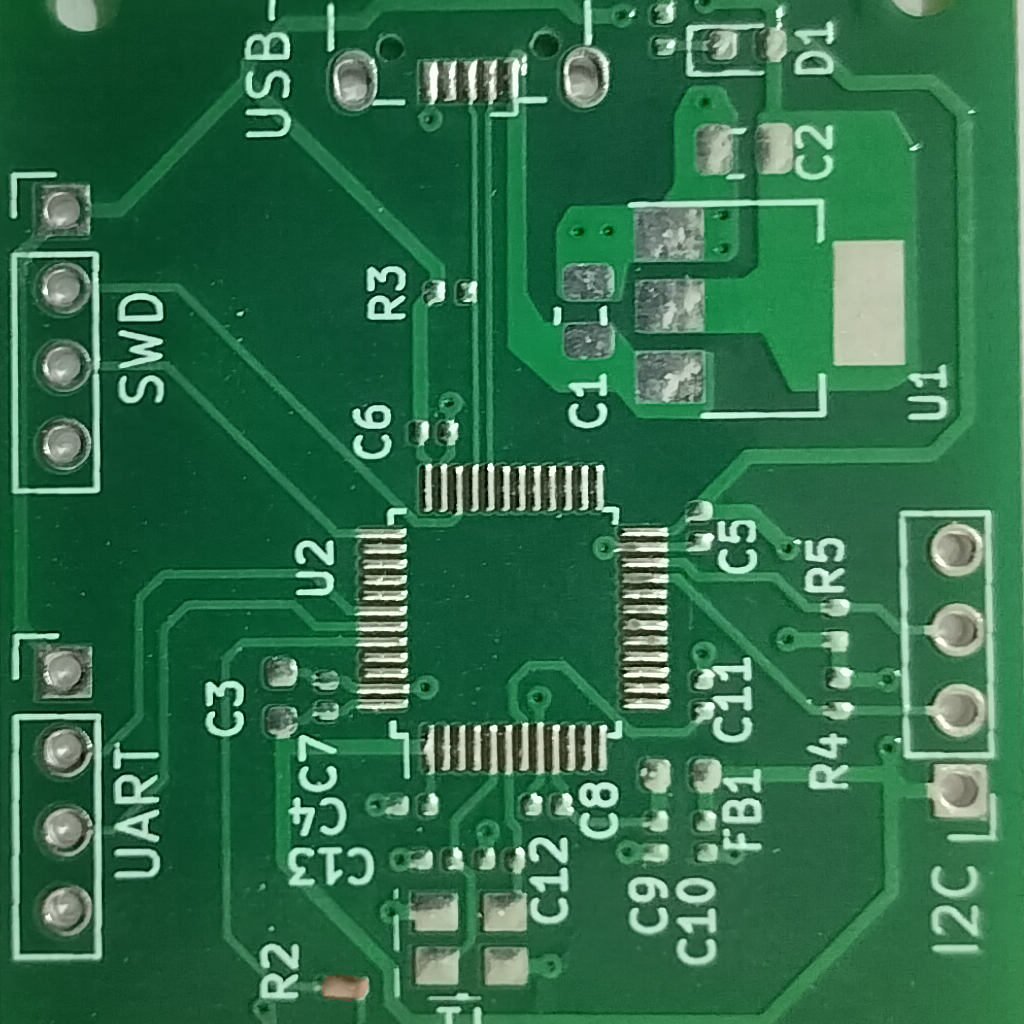

In [18]:
import torch
from torchvision.io import read_image
from torchvision.transforms import Resize, ToPILImage
from torchvision.utils import draw_segmentation_masks, make_grid

from anomalib.pre_processing.tiler import Tiler

# Assuming that datasets directory is located in the root directory.
# image = read_image(path="../../datasets/MVTec/bottle/test/good/000.png")
image = read_image(path=str(dataset_root / "_test/soldershot/006.png"))
mask = read_image(path=str(dataset_root / "_ground_truth/soldershot/006_mask.png")).bool()
overlayed_image = draw_segmentation_masks(image, mask, alpha=0.2, colors=["red"])
print(image.size(), mask.size())

ToPILImage()(overlayed_image)

In [19]:
#then remove the old folders with _folder_names since we are going to use mvtec format